In [2]:
import pickle
import pandas as pd

df = pd.read_pickle('sah_raw_data.pkl')
df

,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,user_id,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
0,1372666939638681603,Thu Mar 18 21:51:15 +0000 2021,@trabreee Given the conservative nature and ti...,None,False,False,[573681712],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",371535654,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
1,1372666939898699778,Thu Mar 18 21:51:16 +0000 2021,Square Enix presenting two new games where the...,None,True,False,[2478263302],[None],"<a href=""http://twitter.com/download/iphone"" r...",2925265201,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2,1372666940511031296,Thu Mar 18 21:51:16 +0000 2021,"Sadly, during the COVID-19 pandemic, the numbe...",None,True,False,[15868178],[None],"<a href=""http://twitter.com/download/iphone"" r...",260284794,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
3,1372666941282869255,Thu Mar 18 21:51:16 +0000 2021,you shouldnt feel obligated to share resources...,None,True,False,[1299106024163627019],[None],"<a href=""http://twitter.com/download/android"" ...",1348409465385725954,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
4,1372666941182197767,Thu Mar 18 21:51:16 +0000 2021,"""what can i do to help #StopAsianHate?"" a thre...",None,True,False,[1134639749438722048],[StopAsianHate],"<a href=""http://twitter.com/download/iphone"" r...",854830153058439169,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909659,1375379047312719876,Fri Mar 26 09:28:12 +0000 2021,"@MrAndyNgo @DineshDSouza Oh WOW look everyone,...",None,False,False,"[2835451658, 91882544]",[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",1368204112039448578,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909660,1375379049615388672,Fri Mar 26 09:28:13 +0000 2021,so zara is gonna sell traditional uyghur &amp;...,None,True,False,[1576992128],[None],"<a href=""http://twitter.com/download/android"" ...",752493071485534208,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909661,1375379049124597760,Fri Mar 26 09:28:13 +0000 2021,🐳🌟🦋AsiAn\n SeCrEtS🦋🌟🐳 https://t.co/PjQXaQPWVA,None,True,False,[1222639589501726720],[None],"<a href=""http://twitter.com/download/android"" ...",1528129160,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2909662,1375379052630974467,Fri Mar 26 09:28:14 +0000 2021,Any followers (institutions and individuals) w...,None,True,False,[2279301618],[None],"<a href=""http://twitter.com/download/android"" ...",1167611353881645056,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'], errors='coerce')
df['date_only'] = df['tweet_created_at'].dt.date

In [3]:
import pandas as pd
import numpy as np
import re

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.utils import simple_preprocess

# NLTK
import nltk
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Preprocessing

# Convert tweets to string

In [4]:
df['text'] = df['text'].apply(str)

# Check for duplicates

In [5]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df = df.reset_index()
df

,index,tweet_id,tweet_created_at,text,tweet_url,retweet,quote,mentions,hashtags,this_tweet_source,...,quote_user_screen_name,quote_user_description,quote_user_location,quote_user_verified,quote_user_followers_count,quote_user_friends_count,quote_user_listed_count,quote_user_favourites_count,quote_user_statuses_count,quote_user_profile_image_url_https
0,0,1372666939638681603,Thu Mar 18 21:51:15 +0000 2021,@trabreee Given the conservative nature and ti...,None,False,False,[573681712],[None],"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
1,1,1372666939898699778,Thu Mar 18 21:51:16 +0000 2021,Square Enix presenting two new games where the...,None,True,False,[2478263302],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
2,2,1372666940511031296,Thu Mar 18 21:51:16 +0000 2021,"Sadly, during the COVID-19 pandemic, the numbe...",None,True,False,[15868178],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
3,3,1372666941282869255,Thu Mar 18 21:51:16 +0000 2021,you shouldnt feel obligated to share resources...,None,True,False,[1299106024163627019],[None],"<a href=""http://twitter.com/download/android"" ...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
4,4,1372666941182197767,Thu Mar 18 21:51:16 +0000 2021,"""what can i do to help #StopAsianHate?"" a thre...",None,True,False,[1134639749438722048],[StopAsianHate],"<a href=""http://twitter.com/download/iphone"" r...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512406,2909649,1375379003687624704,Fri Mar 26 09:28:02 +0000 2021,Why this Asian city wraps its towers in 'cocoo...,http://dlvr.it/RwPpQ7,False,False,[],[None],"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
512407,2909650,1375379005826682880,Fri Mar 26 09:28:02 +0000 2021,Stop the Racism and Violence against Asians!\n...,None,True,False,[1021425678795845640],"[StopAsianHate, AsiansAreHuman, RacismIsNotCom...","<a href=""http://twitter.com/download/android"" ...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
512408,2909651,1375379009333161985,Fri Mar 26 09:28:03 +0000 2021,"@abcnews when you report negative news, the ph...",None,False,False,[2768501],[None],"<a href=""http://twitter.com/download/android"" ...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None
512409,2909657,1375379029885284357,Fri Mar 26 09:28:08 +0000 2021,"to my asian friends, i love you so much, your ...",None,False,False,[],[None],"<a href=""http://twitter.com/download/iphone"" r...",...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None


In [6]:
df=df[['text']]
df

,text
0,@trabreee Given the conservative nature and ti...
1,Square Enix presenting two new games where the...
2,"Sadly, during the COVID-19 pandemic, the numbe..."
3,you shouldnt feel obligated to share resources...
4,"""what can i do to help #StopAsianHate?"" a thre..."
...,...
512406,Why this Asian city wraps its towers in 'cocoo...
512407,Stop the Racism and Violence against Asians!\n...
512408,"@abcnews when you report negative news, the ph..."
512409,"to my asian friends, i love you so much, your ..."


In [11]:
sample_df = df.groupby('date_only').apply(lambda x: x.sample(frac=0.001, random_state=42))
sample_df

text  \
date_only                                                              
2021-03-18 8101    Delaina Ashley Yuan\nPaul Andre Michels\nXiaoj...   
           22405   Asian Women Are Facing a Terrifying Rise in Ha...   
           9607    @justreadingdon1 @DavidOAtkins Don made them t...   
           13209   @john_arends Absolutely awful!! 😢 Attacking el...   
           31918   asian women are not your wee woo anime toys. t...   
...                                                              ...   
2021-03-26 502320  We Need To Talk About Anti-Asian Hate https://...   
           505203  New York City ""deploying Asian"" undercover f...   
           505142  @ShizTradersSay @zerohedge ... violent and rac...   
           503988  @eugenegu #Blacklivesmatter\n\n#Asianlivesmatt...   
           509075  demons coming ... this shooters gonna cry in c...   

                    date_only  
date_only                      
2021-03-18 8101    2021-03-18  
           22405   2021-03-18  
           9607    2021-03-18  
           13209   2021-03-18  
           31918   2021-03-18  
...                       ...  
2021-03-26 502320  2021-03-26  
           505203  2021-03-26  
           505142  2021-03-26  
           503988  2021-03-26  
           509075  2021-03-26  

[512 rows x 2 columns]

In [13]:
sample_df.to_excel("Stratified_sampled_by_date.xlsx")

In [5]:
df=pd.read_csv('Stratified_resampling_by_date.csv')
df = df['text'].to_frame() 
df

,text
0,Delaina Ashley Yuan\nPaul Andre Michels\nXiaoj...
1,Asian Women Are Facing a Terrifying Rise in Ha...
2,@justreadingdon1 @DavidOAtkins Don made them t...
3,@john_arends Absolutely awful!! 😢 Attacking el...
4,asian women are not your wee woo anime toys. t...
...,...
507,We Need To Talk About Anti-Asian Hate https://...
508,"New York City """"deploying Asian"""" undercover f..."
509,@ShizTradersSay @zerohedge ... violent and rac...
510,@eugenegu #Blacklivesmatter\n\n#Asianlivesmatt...


# Count total number of characters and mean length of a tweet

In [7]:
count = df['text'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
print("Total number of words:", count.sum(), "words")

Total number of words: 14132771 words


In [8]:
print("Mean number of words per tweet:", round(count.mean(),2), "words")

Mean number of words per tweet: 27.58 words


In [9]:
df["tweet_length"] = df["text"].str.len()
print("Total length of the dataset is:", df.tweet_length.sum(), "characters")

Total length of the dataset is: 91270025 characters


<ipython-input-9-bb46ef7d1f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet_length"] = df["text"].str.len()


In [10]:
print("Mean Length of a tweet is:", round(df.tweet_length.mean(),0), "characters")
df = df.drop(['tweet_length'], axis=1)

Mean Length of a tweet is: 178.0 characters


# Removing Twitter Handles (@user)

In [11]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [12]:
df['tidy_tweet'] = np.vectorize(remove_users)(df['text'], "@ [\w]*", "@[\w]*")

# Normalization

In [13]:
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

# Remove Hashtags from tweets

In [14]:
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [15]:
df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")

# Remove Links

In [16]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [17]:
df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])

# Removing Punctuations, Numbers, and Special Characters

In [18]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-18-42c580297310>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


# Tokenize words and clean-up Punctuations

In [19]:
def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations
df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))

# Remove Stopwords

In [20]:
# Prepare Stop Words
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt','amp'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fanyangxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

In [22]:
df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])

# WordCloud

In [23]:
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

df['no_stop_joined'] = df.apply(rejoin_words, axis=1)
all_words = ' '.join([text for text in df['no_stop_joined']])

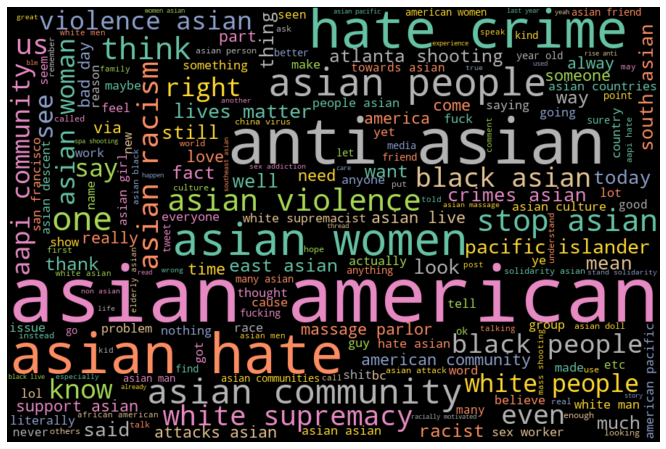

In [24]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='black', 
                      max_words=200,colormap='Set2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Part II: Topic Modelling 

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Bigrams

In [26]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('given', 'conservative'),
 ('conservative', 'nature'),
 ('nature', 'tight'),
 ('tight', 'family'),
 ('family', 'values'),
 ('values', 'asian'),
 ('asian', 'cultures'),
 ('cultures', 'understand'),
 ('understand', 'block'),
 ('block', 'generally'),
 ('generally', 'vote'),
 ('vote', 'democrat')]

In [27]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [28]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])
len(bigram_counts)

2365292

In [29]:
bigram_df.head(15)

,bigram,count
0,"(anti, asian)",47031
1,"(asian, americans)",38863
2,"(asian, american)",35267
3,"(asian, hate)",35145
4,"(asian, women)",22914
5,"(hate, crimes)",20997
6,"(asian, people)",16398
7,"(asian, community)",13568
8,"(hate, crime)",11680
9,"(asian, violence)",10545


Number of Bigrams Identified 25


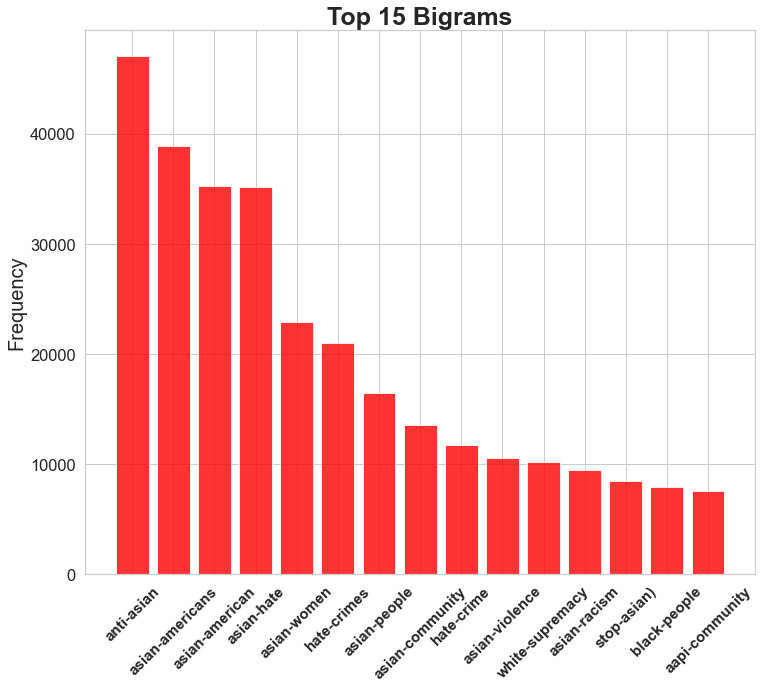

In [30]:
bigram_label = ['anti-asian','asian-americans', 'asian-american','asian-hate', 'asian-women','hate-crimes','asian-people',
                'asian-community', 'hate-crime','asian-violence','white-supremacy','asian-racism','stop-asian)','black-people',
                'aapi-community']
bigram_freq = bigram_df['count'].head(15)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'red')
plt.ylabel('Frequency', fontsize=20)
plt.xticks(index, bigram_label, fontsize=15, rotation=45, fontweight="bold") 
plt.title('Top 15 Bigrams', fontsize=25, fontweight="bold")
plt.show()

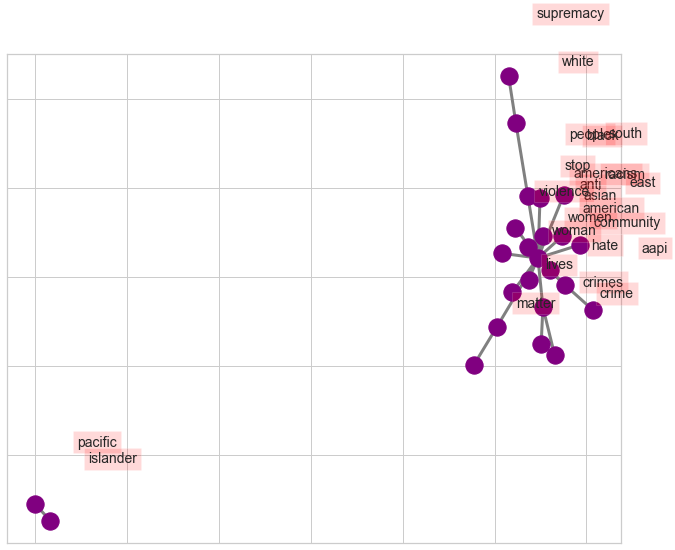

In [31]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

# Bigrams and Trigrams

# Tokenize

In [32]:
data = df.no_stop_joined.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 
        
data_words = list(sent_to_words(data))

# Make Bigrams and Trigrams

In [33]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [34]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Lemmatization

In [35]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [36]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

# Dropping Duplicates

In [ ]:
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    print(joined_words)
    return joined_words

df['lemmatized_joined'] = df.apply(rejoin_words, axis=1)

In [ ]:
df = df.drop_duplicates(subset=['lemmatized_joined'], keep='first', inplace=False)
df.shape

# Stemming

In [ ]:
stemmer = PorterStemmer()
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])
df

# Create Dictionary and Corpus

In [ ]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])

In [ ]:
print(id2word_stemmed)

In [ ]:
print(id2word_lemma)

In [ ]:
print(id2word_tidy)

In [ ]:
tweets_stemmed = df['stemmed']
tweets_lamma = df['lemmatized']

In [ ]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]
corpus_lemma = [id2word_lemma.doc2bow(tweet) for tweet in tweets_lamma]

In [ ]:
print(len(corpus_lemma))

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

# LDA Model

# Find the Optimal number of Topics

In [ ]:
mallet_path = '/Users/fanyangxin/Desktop/mallet-2.0.8/bin/mallet' # update this path

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_lemma, num_topics=num_topics, id2word=id2word_lemma)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [50]:
df

,text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized,lemmatized_joined,stemmed
0,@trabreee Given the conservative nature and ti...,given the conservative nature and tight famil...,"[given, the, conservative, nature, and, tight,...","[given, conservative, nature, tight, family, v...",given conservative nature tight family values ...,"[give, conservative, nature, tight, family, va...",give conservative nature tight family value as...,"[give, conserv, natur, tight, famili, valu, as..."
1,Square Enix presenting two new games where the...,square enix presenting two new games where the...,"[square, enix, presenting, two, new, games, wh...","[square, enix, presenting, two, new, games, pr...",square enix presenting two new games protagoni...,"[square_enix, present, new, game, protagonist,...",square_enix present new game protagonist asian...,"[square_enix, present, new, game, protagonist,..."
2,"Sadly, during the COVID-19 pandemic, the numbe...",sadly during the covid pandemic the numbe...,"[sadly, during, the, covid, pandemic, the, num...","[sadly, covid, pandemic, number, incidents, an...",sadly covid pandemic number incidents anti asi...,"[sadly, covid, pandemic, number, incident, ant...",sadly covid pandemic number incident anti asia...,"[sadli, covid, pandem, number, incid, anti, as..."
3,you shouldnt feel obligated to share resources...,you shouldnt feel obligated to share resources...,"[you, shouldnt, feel, obligated, to, share, re...","[shouldnt, feel, obligated, share, resources, ...",shouldnt feel obligated share resources protec...,"[feel, obligated, share, resource, protect, as...",feel obligated share resource protect asian li...,"[feel, oblig, share, resourc, protect, asian, ..."
4,"""what can i do to help #StopAsianHate?"" a thre...",what can i do to help a thread with inform...,"[what, can, do, to, help, thread, with, inform...","[help, thread, information, resources, please,...",help thread information resources please add,"[help, thread, information, resource, add]",help thread information resource add,"[help, thread, inform, resourc, add]"
...,...,...,...,...,...,...,...,...
227165,so an Asian girl got assaulted in an elevator ...,so an asian girl got assaulted in an elevator ...,"[so, an, asian, girl, got, assaulted, in, an, ...","[asian, girl, got, assaulted, elevator, plaza,...",asian girl got assaulted elevator plaza town n...,"[asian, girl, get, assault, elevator, plaza, t...",asian girl get assault elevator plaza town nex...,"[asian, girl, get, assault, elev, plaza, town,..."
227166,@VE6AEQ @KimsConvenience @jean_yoon @bitterasi...,yep to me it s more than sad though ...,"[yep, to, me, it, more, than, sad, though, it,...","[yep, sad, though, like, heart, breaking, seen...",yep sad though like heart breaking seen increa...,"[sad, though, heart, breaking, see, increase, ...",sad though heart breaking see increase attack ...,"[sad, though, heart, break, see, increas, atta..."
227167,@haloman362 @rabidotter1996 @FUNimation This i...,this is on a post that s responding to a m...,"[this, is, on, post, that, responding, to, mas...","[post, responding, mass, shooting, asian, peop...",post responding mass shooting asian people rea...,"[post, respond, mass_shoote, asian, people, re...",post respond mass_shoote asian people read room,"[post, respond, mass_shoot, asian, peopl, read..."
227168,Friendly reminder; asian people aren't obligat...,friendly reminder asian people aren t obligat...,"[friendly, reminder, asian, people, aren, obli...","[friendly, reminder, asian, people, obligated,...",friendly reminder asian people obligated talk ...,"[friendly_reminder, asian, people, obligate, t...",friendly_reminder asian people obligate talk h...,"[friendly_remind, asian, peopl, oblig, talk, h..."


In [51]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_lemma, corpus=corpus_lemma, texts=df['lemmatized'], start=2, limit=20, step=1)

In [72]:
from pprint import pprint
# display topics
pprint(model_list[4].show_topics(formatted=False))

[(8,
  [('asian', 0.11983895072606009),
   ('work', 0.036592982534406994),
   ('experience', 0.019383908456202182),
   ('face', 0.016718342218554127),
   ('time', 0.01543574758537619),
   ('hard', 0.013009970779148358),
   ('speak', 0.012653074881220585),
   ('learn', 0.012508085922687427),
   ('kid', 0.01161026967946287),
   ('change', 0.011309138765586313)]),
 (10,
  [('asian', 0.0699037753023276),
   ('country', 0.03721663560313814),
   ('call', 0.03608426162715097),
   ('china', 0.03313142039790213),
   ('american', 0.031581856009709156),
   ('chinese', 0.029810151272159854),
   ('america', 0.02464132460664904),
   ('trump', 0.02321637553638767),
   ('virus', 0.019391227081617616),
   ('covid', 0.018150491959602964)]),
 (11,
  [('asian', 0.17540140192362125),
   ('make', 0.07032928000177599),
   ('culture', 0.023787191768277455),
   ('thing', 0.02258284724804502),
   ('talk', 0.018703414899462208),
   ('lot', 0.014984931818560225),
   ('point', 0.014046986086213308),
   ('comment',

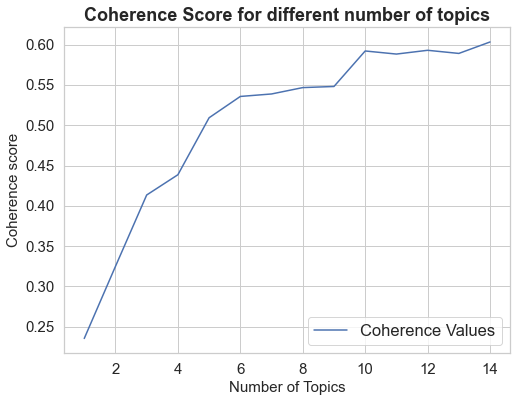

In [52]:
# Show graph
limit=15; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=18, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=15)
plt.ylabel("Coherence score", fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [86]:
ldamallet=model_list[7]

In [87]:
import pickle
pickle.dump(ldamallet, open("/Users/fanyangxin/Desktop/Stop hate/ldamallet.pkl", "wb"))

In [88]:
ldamallet = pickle.load(open("/Users/fanyangxin/Desktop/Stop hate/ldamallet.pkl", "rb"))
tm_results = ldamallet[corpus_lemma]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
Term1,people,american,asian,asian,community,woman,asian,asian
Term2,white,hate,make,feel,anti,kill,attack,atlanta
Term3,black,crime,stop,post,racism,sex,culture,support
Term4,man,racist,country,chinese,violence,guy,love,video
Term5,aapi,year,life,start,speak,thing,talk,give


In [85]:
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Term1,asian,community,asian,asian,hate
Term2,life,atlanta,woman,american,people
Term3,speak,support,racism,make,white
Term4,thing,country,racist,violence,crime
Term5,culture,shooting,kill,attack,black
Term6,video,man,call,family,anti
Term7,day,aapi,sex,live,victim
Term8,talk,stand,guy,stop,stop
Term9,south,friend,start,korean,biden
Term10,show,girl,happen,place,fact


In [89]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-89-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic1,"people, white, black, man, aapi, live, find, race, bad, news, wrong, put, east, problem, supremacy, area, page, line, claim, supremacist"
Topic2,"american, hate, crime, racist, year, rise, report, biden, tweet, vigil, official, forget, vote, big, state, large, check, night, pm, tuesday"
Topic3,"asian, make, stop, country, life, call, minority, place, person, food, school, head, link, read, descent, treat, plan, gt, pandemic, racial"
Topic4,"asian, feel, post, chinese, start, good, bring, fuck, include, hold, thread, open, great, history, fund, child, burden, side, pacific, clear"
Topic5,"community, anti, racism, violence, speak, stand, family, solidarity, event, hear, word, social, join, back, donate, condemn, action, member, resource, issue"
Topic6,"woman, kill, sex, guy, thing, friend, shooting, spa, work, day, long, girl, comment, massage, world, murder, story, parlor, addiction, money"
Topic7,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
Topic8,"asian, atlanta, support, video, give, victim, show, time, week, mass, happen, send, shooting, lie, flu, grow, article, today, hope, assault"


IndexError: index 8 is out of bounds for axis 0 with size 8

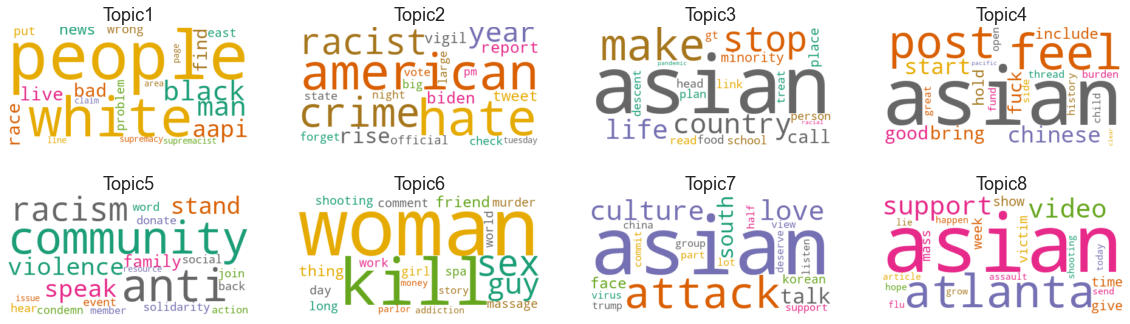

In [90]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(12):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [91]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

,Dominant Topic,Contribution %,Topic Terms
0,3,16.87,"asian, make, stop, country, life, call, minority, place, person, food, school, head, link, read, descent, treat, plan, gt, pandemic, racial"
1,7,15.53,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
2,7,17.75,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
3,7,15.28,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
4,4,16.52,"asian, feel, post, chinese, start, good, bring, fuck, include, hold, thread, open, great, history, fund, child, burden, side, pacific, clear"


In [92]:
corpus_topic_df

,Dominant Topic,Contribution %,Topic Terms
0,3,16.87,"asian, make, stop, country, life, call, minority, place, person, food, school, head, link, read, descent, treat, plan, gt, pandemic, racial"
1,7,15.53,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
2,7,17.75,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
3,7,15.28,"asian, attack, culture, love, talk, south, face, korean, support, half, virus, trump, group, view, china, commit, part, deserve, lot, listen"
4,4,16.52,"asian, feel, post, chinese, start, good, bring, fuck, include, hold, thread, open, great, history, fund, child, burden, side, pacific, clear"
...,...,...,...
504,2,13.43,"american, hate, crime, racist, year, rise, report, biden, tweet, vigil, official, forget, vote, big, state, large, check, night, pm, tuesday"
505,2,15.68,"american, hate, crime, racist, year, rise, report, biden, tweet, vigil, official, forget, vote, big, state, large, check, night, pm, tuesday"
506,5,15.61,"community, anti, racism, violence, speak, stand, family, solidarity, event, hear, word, social, join, back, donate, condemn, action, member, resource, issue"
507,2,16.40,"american, hate, crime, racist, year, rise, report, biden, tweet, vigil, official, forget, vote, big, state, large, check, night, pm, tuesday"


In [93]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus_lemma), 2))

dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Perc
0,1,80,15.72
1,2,76,14.93
2,3,61,11.98
3,4,48,9.43
4,5,70,13.75
5,6,70,13.75
6,7,56,11.00
7,8,48,9.43


In [74]:
from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [75]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [76]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus_lemma, id2word_lemma, sort_topics=False)
pyLDAvis.display(vis_data)

In [67]:
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [68]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.122*"peopl" + 0.088*"white" + 0.072*"black" + 0.035*"man" + 0.022*"race" '
  '+ 0.016*"chines" + 0.015*"lot" + 0.011*"supremaci" + 0.011*"ralli" + '
  '0.011*"actual"'),
 (1,
  '0.032*"attack" + 0.027*"call" + 0.027*"need" + 0.021*"look" + 0.018*"tell" '
  '+ 0.017*"china" + 0.015*"still" + 0.013*"trump" + 0.011*"back" + '
  '0.011*"alway"'),
 (2,
  '0.209*"asian" + 0.017*"go" + 0.015*"see" + 0.015*"make" + 0.014*"know" + '
  '0.013*"think" + 0.011*"time" + 0.010*"even" + 0.010*"want" + 0.010*"take"'),
 (3,
  '0.090*"american" + 0.044*"anti" + 0.037*"racism" + 0.029*"violenc" + '
  '0.022*"atlanta" + 0.020*"shoot" + 0.014*"much" + 0.013*"year" + '
  '0.011*"today" + 0.010*"hear"'),
 (4,
  '0.067*"woman" + 0.054*"say" + 0.046*"get" + 0.038*"racist" + 0.025*"kill" + '
  '0.022*"come" + 0.019*"love" + 0.018*"victim" + 0.018*"day" + '
  '0.015*"murder"'),
 (5,
  '0.118*"hate" + 0.072*"commun" + 0.063*"crime" + 0.050*"stop" + '
  '0.033*"support" + 0.033*"aapi" + 0.023*"stand" + 0

# Visualize with pyLDAvis

In [57]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

In [58]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.434769  0.099175       1        1  26.558864
3     -0.027915 -0.441103       2        1  22.744132
2      0.073989  0.109626       3        1  13.530116
1      0.094323  0.064727       4        1  12.884559
4      0.103530  0.072322       5        1  11.128901
0      0.097760  0.050166       6        1   8.550043
6      0.093082  0.045086       7        1   4.603384, topic_info=          Term           Freq          Total Category  logprob  loglift
0        asian  194114.000000  194114.000000  Default  30.0000  30.0000
50       peopl   39356.000000   39356.000000  Default  29.0000  29.0000
181      white   26992.000000   26992.000000  Default  28.0000  28.0000
14    american   38909.000000   38909.000000  Default  27.0000  27.0000
79        hate   35812.000000   35812.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
520     apolog    1158.898859    1159.796018   Topic7  -4.6564   3.0776
770     messag    1122.464303    1123.360914   Topic7  -4.6883   3.0776
131      liber    1081.032976    1081.929703   Topic7  -4.7259   3.0775
2096       tag    1056.069122    1056.966249   Topic7  -4.7493   3.0775
160       open    1011.504775    1012.401787   Topic7  -4.7924   3.0775

[241 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
228       2  0.999899     aapi
495       1  0.999793      act
585       6  0.999761   actual
2850      5  0.999555  african
812       6  0.999640     agre
...     ...       ...      ...
138       2  0.999870     work
1157      5  0.999628    write
377       6  0.999681    wrong
124       5  0.999816     year
222       5  0.999322    young

[211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 2, 5, 1, 7])

# Optimal Model

In [59]:
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=8))

[(0,
  '0.111*"peopl" + 0.105*"asian" + 0.076*"white" + 0.063*"black" + '
  '0.040*"racist" + 0.020*"race" + 0.020*"fuck" + 0.012*"supremaci"'),
 (1,
  '0.085*"asian" + 0.017*"love" + 0.015*"cultur" + 0.014*"good" + 0.008*"girl" '
  '+ 0.008*"watch" + 0.008*"south" + 0.007*"video"'),
 (2,
  '0.109*"hate" + 0.086*"asian" + 0.061*"crime" + 0.051*"american" + '
  '0.042*"anti" + 0.039*"stop" + 0.020*"countri" + 0.018*"call"'),
 (3,
  '0.037*"asian" + 0.031*"support" + 0.025*"time" + 0.017*"work" + '
  '0.014*"friend" + 0.014*"read" + 0.013*"today" + 0.013*"post"'),
 (4,
  '0.098*"asian" + 0.077*"woman" + 0.031*"man" + 0.030*"atlanta" + '
  '0.030*"kill" + 0.026*"shoot" + 0.024*"day" + 0.023*"attack"'),
 (5,
  '0.074*"commun" + 0.062*"american" + 0.056*"amp" + 0.052*"racism" + '
  '0.048*"violenc" + 0.042*"asian" + 0.028*"stand" + 0.022*"aapi"'),
 (6,
  '0.075*"asian" + 0.038*"make" + 0.020*"feel" + 0.019*"happen" + '
  '0.018*"thing" + 0.018*"realli" + 0.018*"talk" + 0.013*"life"')]


# Dominant topic

In [63]:
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=7, id2word=id2word_stemmed)

def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1698,"asian, love, cultur, good, girl, watch, south,...","[give, conserv, natur, tight, famili, valu, as..."
1,1,3.0,0.1587,"asian, support, time, work, friend, read, toda...","[square_enix, present, new, game, protagonist,..."
2,2,4.0,0.1989,"asian, woman, man, atlanta, kill, shoot, day, ...","[sadli, covid, pandem, number, incid, anti, as..."
3,3,5.0,0.1712,"commun, american, amp, racism, violenc, asian,...","[feel, oblig, share, resourc, protect, asian, ..."
4,4,3.0,0.2063,"asian, support, time, work, friend, read, toda...","[help, thread, inform, resourc, add]"
5,5,6.0,0.1985,"asian, make, feel, happen, thing, realli, talk...","[asian, happen, truli, heartbreak, hatr, racis..."
6,6,3.0,0.1613,"asian, support, time, work, friend, read, toda...","[caus, anger, asian, american, person, handl, ..."
7,7,1.0,0.2115,"asian, love, cultur, good, girl, watch, south,...","[listen, kpop, watch, anim, enjoy, asian, food..."
8,8,0.0,0.1536,"peopl, asian, white, black, racist, race, fuck...","[trend, america, push]"
9,9,6.0,0.1840,"asian, make, feel, happen, thing, realli, talk...","[live, small, town, texa, live, texa, year, co..."


# Total Topic Distrubution across documents

In [64]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,1.0,0.1599,"asian, love, cultur, good, girl, watch, south,..."
1,0.0,0.1534,"peopl, asian, white, black, racist, race, fuck..."
2,4.0,0.1489,"asian, woman, man, atlanta, kill, shoot, day, ..."
3,2.0,0.1470,"hate, asian, crime, american, anti, stop, coun..."
4,3.0,0.1359,"asian, support, time, work, friend, read, toda..."
5,6.0,0.1295,"asian, make, feel, happen, thing, realli, talk..."
6,5.0,0.1253,"commun, american, amp, racism, violenc, asian,..."


In [66]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5432,"peopl, asian, white, black, racist, race, fuck...",NaN
1,1.0,0.4749,"asian, love, cultur, good, girl, watch, south,...",NaN
2,2.0,0.4787,"hate, asian, crime, american, anti, stop, coun...","[standbi, violenc, minor, continu]"
3,3.0,0.3588,"asian, support, time, work, friend, read, toda...","[random, white, guy, attack, elderli, asian, s..."
4,4.0,0.3663,"asian, woman, man, atlanta, kill, shoot, day, ...","[care, asian]"
5,5.0,0.4049,"commun, american, amp, racism, violenc, asian,...","[see, posting_yellow, pictur, say, think, time..."
6,6.0,0.3262,"asian, make, feel, happen, thing, realli, talk...","[spike, anti, asian, hate, racist, conflat, ev..."


In [67]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_Tweets', 'Perc_Tweets']

# Show
df_dominant_topics['Perc_Tweets'] = df_dominant_topics['Perc_Tweets'] * 100

In [68]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']
df_dominant_topics

,Topic,Topic_Keywords,Num_Tweets,Perc_Tweets,Text
0.0,0.0,"peopl, asian, white, black, racist, race, fuck...",29700,15.34,NaN
1.0,1.0,"asian, love, cultur, good, girl, watch, south,...",30953,15.99,NaN
2.0,2.0,"hate, asian, crime, american, anti, stop, coun...",28469,14.70,"[standbi, violenc, minor, continu]"
3.0,3.0,"asian, support, time, work, friend, read, toda...",26318,13.59,"[random, white, guy, attack, elderli, asian, s..."
4.0,4.0,"asian, woman, man, atlanta, kill, shoot, day, ...",28829,14.89,"[care, asian]"
5.0,5.0,"commun, american, amp, racism, violenc, asian,...",24264,12.53,"[see, posting_yellow, pictur, say, think, time..."
6.0,6.0,"asian, make, feel, happen, thing, realli, talk...",25070,12.95,"[spike, anti, asian, hate, racist, conflat, ev..."


Total Tweets 193603


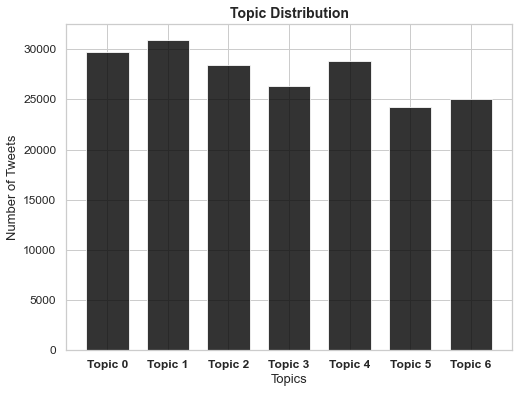

In [69]:
sns.set_style("whitegrid")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9']
freq = df_dominant_topics['Num_Tweets']
index = np.arange(len(freq))

print("Total Tweets", df_dominant_topics['Num_Tweets'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'black', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()